# Transformer-Based Architectures for Immediate-Term Temporal Forecasting: A Study on Financial Time Series Data

## Introduction

This study investigates the application of transformer-based architectures to the forecasting of financial time series, specifically targeting immediate-term prediction tasks. The analysis is based on log returns computed from daily closing prices of the DAX40 index. A decoder-only transformer variant, referred to as the **PatternDecoder**, is introduced and assessed in the context of short-sequence forecasting. The architecture is evaluated using three attention mechanisms: full attention, convolutional attention, and Auto-Correlation attention. In addition to the PatternDecoder, established transformer variants such as the standard **Transformer**, **Informer**, and **Autoformer** are included for comparative analysis.

The **Transformer** model, initially introduced by *[Vaswani et al. (2017)](https://arxiv.org/abs/1706.03762)*, utilizes self-attention to represent dependencies within sequential data. Although originally developed for natural language processing, this architecture has been adapted to a range of time series forecasting tasks. Within this study, the standard Transformer is applied using full, convolutional, and LogSparse attention configurations, with the aim of improving the modeling of temporal patterns.
To mitigate computational and memory-related constraints in transformer models when applied to time series data, alternative attention mechanisms have been developed. For example, convolutional and LogSparse attention schemes, as discussed in *[Li et al. (2019)](https://arxiv.org/abs/1907.00235)*, are employed to enhance scalability and efficiency in sequence modeling.

**Decoder-only transformers** are composed of stacked decoder layers that include masked self-attention and feed-forward sublayers. These models are designed for autoregressive tasks and are commonly applied in large-scale language models such as GPT-3 and GPT-4. The design incorporates architectural elements such as residual connections and layer normalization to support stable and efficient learning (*[Chen, 2025](https://arxiv.org/html/2504.16361v1)*).

The **Informer** model, introduced by *[Zhou et al. (2021)](https://arxiv.org/abs/2012.07436)*, incorporates a ProbSparse self-attention mechanism. This approach selectively attends to the most relevant time steps, enabling reduced computational complexity and improved efficiency in the context of long sequence forecasting.

The **Autoformer**, as proposed in *[Wu et al. (2021)](https://arxiv.org/abs/2106.13008)*, extends the transformer design by introducing a decomposition block that explicitly separates time series into seasonal and trend components. This architecture employs an Auto-Correlation attention mechanism to identify lag-based periodic patterns, supporting more structured temporal modeling.

Additionally, hybrid neural architectures combining **1D Convolutional (Conv1D)** layers and **Long Short-Term Memory (LSTM)** units are included as baseline models. These architectures aim to integrate localized pattern extraction with recurrent state modeling capabilities.

To support the modeling of immediate-term financial time series, the **PatternDecoder** architecture is introduced as a decoder-only transformer variant optimized for short input sequences. The architecture's components and attention mechanisms are selected to address the specific characteristics of short-sequence forecasting tasks.

Model performance is evaluated using **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)** on both training and test datasets. The results are intended to provide a comparative assessment of each model’s ability to capture short-term temporal dependencies and represent complex dynamics in financial time series.


### What is a Time Series?

A **time series** is a sequence of observations recorded at successive, typically uniform time intervals. The key characteristic of time series data is the temporal ordering of observations, where each value is associated with a specific point in time. This ordering introduces potential dependencies between observations, distinguishing time series from cross-sectional or randomly ordered data.

Formally, a univariate time series $\{X_t\}_{t=1}^T$ is considered a realization of a stochastic process, a sequence of random variables indexed by time. Time series data are encountered across various application domains, including finance (e.g., asset prices), economics (e.g., interest rates), meteorology (e.g., temperature measurements), and engineering (e.g., sensor readings).

Typical characteristics of time series include:

- **Temporal Dependency**: Observations may exhibit autocorrelation, where the value at a given time point is statistically related to its previous values.
- **Equidistant Sampling**: Observations are commonly recorded at fixed time intervals (e.g., daily, hourly, monthly).
- **Chronological Indexing**: Each observation is associated with a time index, and the sequence in which data appear is essential for analysis.

Time series analysis involves the application of techniques to identify underlying structures, characterize temporal dynamics, and generate forecasts. Many statistical approaches, such as the _Autoregressive Integrated Moving Average (ARIMA)_ model, assume **stationarity**, meaning that the distributional properties of the series (e.g., mean, variance, autocorrelation) are invariant over time.

When time series exhibit trends, seasonal effects, or varying variance (heteroscedasticity), they may be classified as **non-stationary**. In such cases, transformations such as differencing or computing log returns are often applied to achieve or approximate stationarity. Satisfying the stationarity assumption is necessary for the proper application of many linear modeling techniques and for the interpretability of model outputs in certain contexts.


#### Financial Time Series

A **financial time series** refers to a sequence of observations representing the value of a financial variable, such as asset prices, exchange rates, interest rates, or market indices, recorded at uniform time intervals. These series exhibit temporal dependence and are often characterized by features such as non-stationarity, volatility clustering, and distributional deviations from normality.

##### Key Characteristics of Financial Time Series

- **Non-Stationarity**: Financial time series frequently exhibit time-varying statistical properties, including changing means and variances. Transformations such as differencing or computing log returns are commonly applied to stabilize the series and facilitate analysis.
- **Volatility Clustering**: Periods of high or low volatility often occur in contiguous intervals. This behavior is reflected in the autocorrelation of squared or absolute returns and is commonly modeled in volatility forecasting frameworks.
- **Heavy Tails and Skewness**: Return distributions may deviate from the Gaussian assumption, displaying excess kurtosis (fat tails) and asymmetry, which has implications for risk estimation and model calibration.
- **Autocorrelation**: While raw returns may exhibit limited linear autocorrelation, nonlinear dependencies often persist, particularly in higher-order moments such as volatility.

##### Efficient Market Hypothesis (EMH)

The **Efficient Market Hypothesis (EMH)** proposes that asset prices incorporate all available information at any given time. Under this framework, the ability to systematically outperform the market through prediction based on publicly or privately available data is limited.

##### Common Forms of EMH

- **Weak Form**: Asserts that asset prices reflect all historical market data, such as prices and trading volumes. Consequently, past price information is not sufficient for predictive modeling.
- **Semi-Strong Form**: Suggests that prices incorporate all publicly available information, including financial reports, news, and macroeconomic indicators.
- **Strong Form**: Assumes that all information, including non-public (insider) information, is fully reflected in asset prices.

##### Implications for Time Series Modeling

- **Random Walk Behavior**: Under EMH assumptions, asset returns follow a stochastic process resembling a random walk, implying that future price changes are not systematically predictable from past observations.
- **Forecasting Complexity**: Financial time series often contain a high degree of noise relative to signal, which complicates the task of generating accurate predictions and limits model performance.
- **Model Evaluation Considerations**: In the context of financial forecasting, even complex models, such as deep neural networks or transformer-based architectures, may yield performance gains that are modest relative to simple benchmarks (e.g., naïve or random walk models). These outcomes highlight the need for careful performance evaluation and baseline comparison.

## Data Set

The dataset used in this study contains daily market data for the German stock market index (DAX40, ticker symbol `^GDAXI`) obtained from Yahoo Finance. The data spans from March 28, 2022, to March 28, 2025, providing 768 trading days of information. The dataset includes several features for each trading day:

1. Date (index)
2. Open price
3. High price
4. Low price
5. Close price
6. Adjusted Close Price *(Adjusted Close price is identical to Close price for DAX40 as it is a performance index)*
7. Volume


It is obtained by the python module `yfinance` from *Yahoo Finance* via
```python
import yfinance as yf
yf.download(tickers = ["^GDAXI"],period ="3y",interval = "1d",auto_adjust = False,prepost = True,threads = True,proxy = None, progress=False)
```
Our analysis focuses primarily on the Close price column, as specified in the configuration file. The dataset is structured with dates as the index to facilitate time series manipulation and analysis.

### Data Reading and Preprocessing

The analysis begins with reading the training and data parameters and model hyperparameters of this study from the configuration file `config/config.yaml`, and importing the historical market data from a CSV file using the pandas library. The file `data/^GDAXI.csv` contains all original feature columns, but the focus is on the *Close* price column, which records the closing price of the market for each trading day, as configured in the `config.yaml` file.

2025-09-01 13:18:04.969982: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


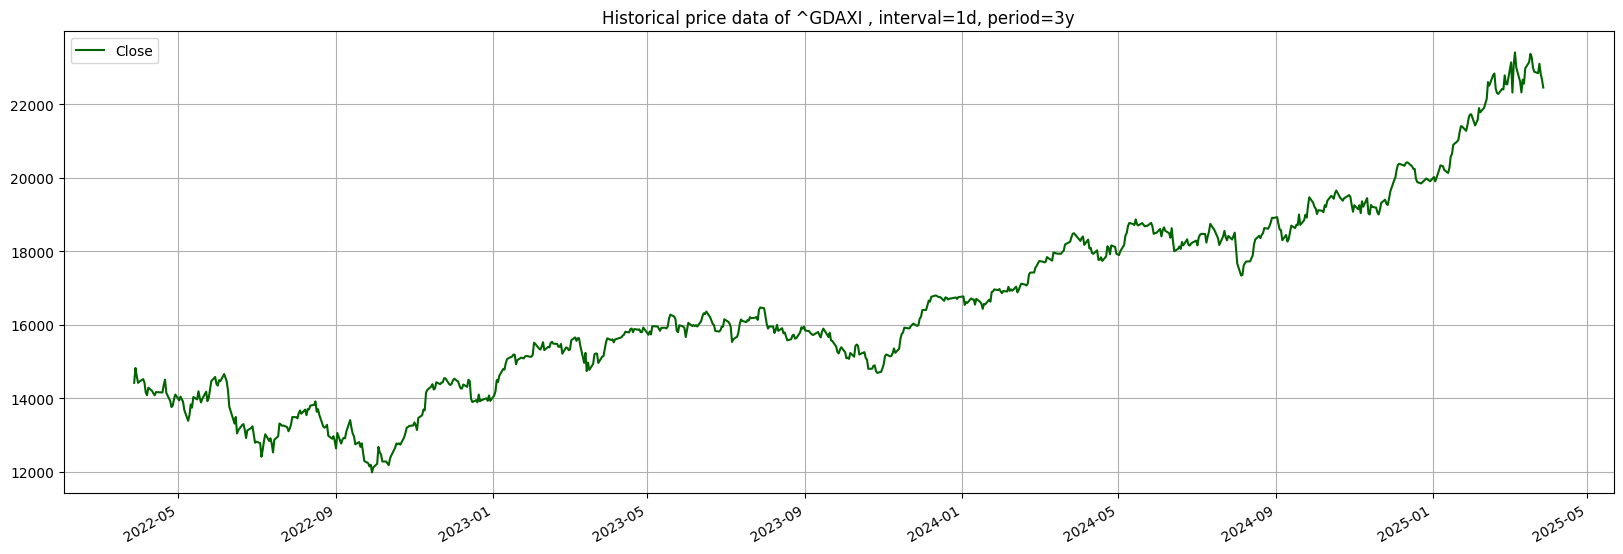

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2025-03-24,22852.660156,22852.660156,23137.480469,22813.109375,23075.759766,66759300
2025-03-25,23109.789062,23109.789062,23182.779297,22845.519531,22913.419922,60671100
2025-03-26,22839.029297,22839.029297,23204.589844,22826.369141,23202.250000,57800000
2025-03-27,22678.740234,22678.740234,22740.470703,22469.880859,22574.460938,74817500
2025-03-28,22461.519531,22461.519531,22614.960938,22377.910156,22558.839844,81650800


In [ ]:
import tensorflow as tf

from patterndecoder.utils import get_stock_data, load_config
import matplotlib.pyplot as plt

# Load parameters and hyperparameters from config.yaml
params = load_config("config/config.yaml")

# Read csv
series_dataframe = get_stock_data(params, False)

# Plot historical data
plt.figure(figsize=(20, 6))
plt.xticks(rotation=30, ha="right")
plt.plot(
    series_dataframe[params["columns"]], color="darkgreen", label=params["columns"]
)
plt.title(
    "Historical price data of "
    + params["ticker"]
    + " , interval="
    + params["interval"]
    + ", period="
    + params["period"]
)
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Print first 5 rows of the DataFrame
series_dataframe.tail()

In [2]:
series_dataframe.describe()

,Adj Close,Close,High,Low,Open,Volume
count,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02
mean,16531.099561,16531.099561,16618.117404,16433.601063,16524.832862,6.878489e+07
std,2571.845906,2571.845906,2572.163347,2565.188749,2567.626699,2.435162e+07
min,11975.549805,11975.549805,12137.769531,11862.839844,11951.839844,0.000000e+00
25%,14514.222656,14514.222656,14596.255371,14403.955322,14536.184814,5.511008e+07
50%,15952.780273,15952.780273,15998.785156,15896.349609,15950.625000,6.487310e+07
75%,18405.998047,18405.998047,18485.879395,18317.012207,18402.887695,7.680058e+07
max,23419.480469,23419.480469,23476.009766,23240.560547,23295.720703,2.170240e+08


### Data Transformation: Daily Log Returns
Rather than working with raw price data, we transform the closing prices into daily log returns. This transformation converts the non-stationary price series into a more stationary return series using the following formula:

$$
r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$

where $P_t$ represents the closing price at time $t$. This transformation offers several advantages for financial time series modeling:

* Additive property: Log returns are additive over time, simplifying multi-period calculations
* Symmetry: Equal percentage gains and losses have similar magnitudes in log space
* Normalization: Mitigates positive skewness common in financial returns
* Stationarity: Produces a more stationary series compared to raw prices

```python
daily_log_returns = (np.log(series_dataframe[data_params["columns"]] / series_dataframe[data_params["columns"]].shift(1))).dropna()
```

1. **Log Transformation**: Converts raw prices to log prices using `np.log()`.
2. **Lag Operation**: `.shift(1)` creates a 1-period lag of the log price series.
3. **Log Return Calculation**: Subtracts the lagged log prices from current log prices
4. **NaN Handling**: Drops missing values (first row, as there is no predecessor $t-1$ )


### Train and Test Set Splitting

Following standard practice in time series modeling, we partition the data into training and testing sets using a chronological split, with $70\%$ of the data allocated to training and the remaining $30\%$ reserved for testing. This approach respects the temporal nature of the data, allowing the model to learn from historical patterns before being evaluated on future, unseen data.

In [ ]:
import numpy as np

# Univariate data analysis on Close price data
# Preprocessing price data to generate daily log returns to normalize the data
daily_log_returns = (
    np.log(
        series_dataframe[params["columns"]]
        / series_dataframe[params["columns"]].shift(1)
    )
).fillna(0)

# Generating the training and test set
train_size = int(daily_log_returns.shape[0] * params["train_split"])
train_data = daily_log_returns.iloc[:train_size]
test_data = daily_log_returns.iloc[train_size:]

test_data.describe()

,Close
count,231.000000
mean,0.000984
std,0.009190
min,-0.036078
25%,-0.004428
50%,0.001265
75%,0.006903
max,0.033223


### Visualization of the training and test data

After loading and preprocessing the dataset, a visualization is created to display the training and testing data. The plot is generated using matplotlib.

- The log returns of the training dataset is plotted in darkgreen and labeled as 'Close (Train Set)'.
- The closing price of the test dataset is plotted in lime and labeled as 'Close (Test Set)'.

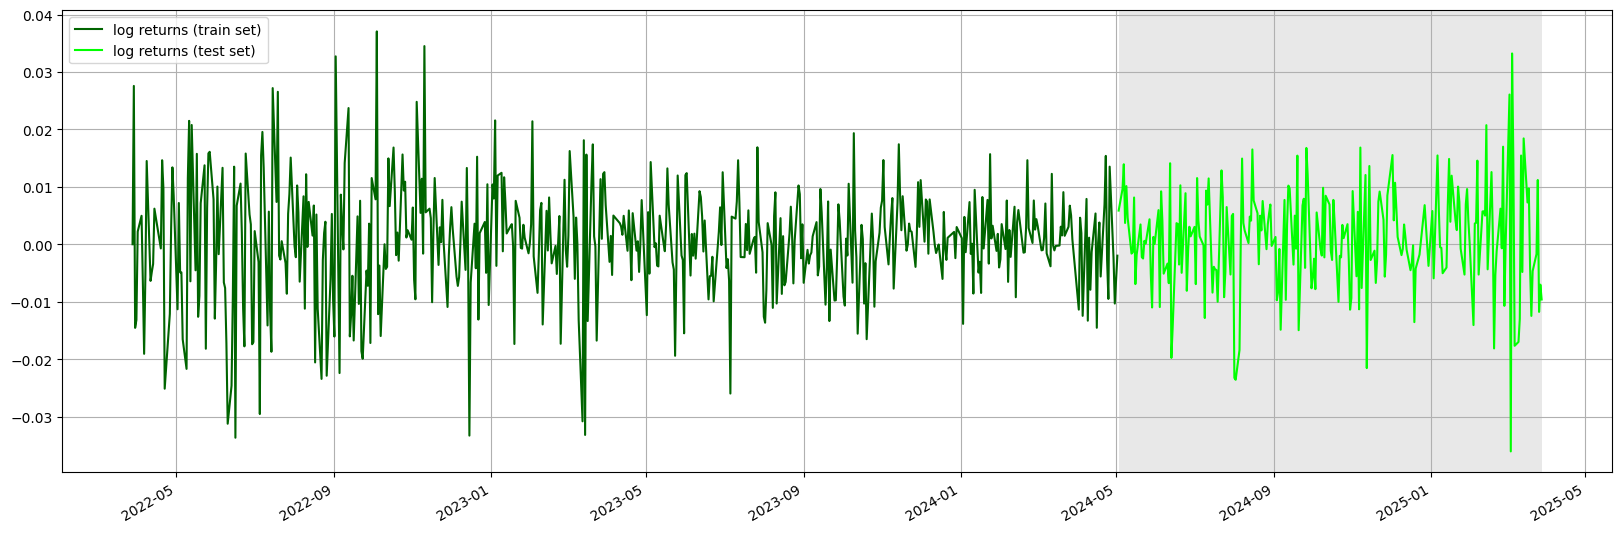

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.xticks(rotation=30, ha="right")

ax = plt.gca()
ax.axvspan(test_data.index[0], test_data.index[-1], facecolor="lightgrey", alpha=0.5)

plt.plot(train_data, color="darkgreen", label="log returns (train set)")
plt.plot(test_data, color="lime", label="log returns (test set)")
plt.legend(loc="upper left")
plt.grid()
plt.show()

### Regarding Stationarity

Stationarity in time series analysis refers to the property that the statistical characteristics of a process, such as mean, variance, and autocorrelation, remain constant over time. In a stationary time series, the distribution does not depend on the specific time at which observations are made; instead, the process exhibits time-invariant behavior. This implies that the mean and variance are stable, and the autocovariance between observations depends only on the lag between them, not on their absolute position in time.

Stationarity is a central assumption in many time series modeling techniques, as it simplifies analysis and forecasting by ensuring that the underlying data-generating process does not change over time. Non-stationary series, characterized by trends, seasonality, or changing variance, violate this assumption and can lead to unreliable model estimates and forecasts. As a result, time series are often transformed, using techniques such as differencing or detrending, to achieve stationarity before applying statistical models.

There are different types of stationarity. Strict stationarity requires that the joint distribution of any set of observations is invariant to time shifts, while weak (or second-order) stationarity requires only that the mean, variance, and autocovariance structure are constant over time. In practical applications, weak stationarity is usually sufficient for most modeling approaches.

#### Augmented Dickey-Fuller (ADF) Test

The Augmented Dickey-Fuller (ADF) test is a widely used statistical procedure for assessing the stationarity of a time series, particularly in the context of econometric and financial data analysis. The primary purpose of the ADF test is to determine whether a unit root is present in an autoregressive model of the time series, which would indicate non-stationarity.

Mathematically, the ADF test extends the original Dickey-Fuller test by incorporating lagged differences of the dependent variable to account for higher-order autocorrelation. The general form of the ADF regression is:

$$
\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + \cdots + \delta_{p-1} \Delta y_{t-p+1} + \varepsilon_t
$$

where $\Delta$ denotes the first difference operator, $\alpha$ is a constant, $\beta$ is the coefficient on a time trend, $p$ is the lag order, and $\varepsilon_t$ is a white noise error term.

The null hypothesis of the ADF test is that the time series possesses a unit root ($\gamma = 0$), implying non-stationarity. The alternative hypothesis is that the series is stationary ($\gamma < 0$), either around a mean or a deterministic trend, depending on the specification. The test statistic is compared to critical values, and a sufficiently negative value leads to rejection of the null hypothesis, indicating that the series is stationary.

The ADF test is robust to higher-order autocorrelation due to its inclusion of lagged difference terms. The appropriate selection of lag length is crucial, as too few lags may leave residual autocorrelation, while too many can reduce the test's power. Information criteria such as the Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC) are often used for lag selection.

#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test offers a complementary approach to the ADF test for assessing stationarity in time series analysis. Unlike the ADF test, the KPSS test assumes stationarity as the null hypothesis and tests for the presence of a unit root as the alternative.

The KPSS test can be configured to test for either level stationarity (constant mean) or trend stationarity (stationarity around a deterministic trend). The null hypothesis posits that the time series is stationary (either around a mean or a deterministic trend), while the alternative hypothesis suggests that the series is non-stationary due to a unit root.

The test statistic is constructed by estimating the long-run variance of the residuals from a regression of the series on a constant or a deterministic trend, depending on the version of the test. If the KPSS statistic exceeds the critical value, the null hypothesis of stationarity is rejected, indicating that the series is likely non-stationary.

The KPSS test is particularly valuable when used in conjunction with the ADF test, as the two tests have reversed null hypotheses. This dual approach provides a more comprehensive assessment of stationarity, helping to resolve ambiguous cases where one test alone may be inconclusive.

## Summary Table: ADF vs. KPSS

| Test | Null Hypothesis | Alternative Hypothesis | Typical Use |
| :-- | :-- | :-- | :-- |
| ADF | Unit root (non-stationary) | Stationary | Detecting non-stationarity |
| KPSS | Stationary | Unit root (non-stationary) | Confirming stationarity |


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
import pandas as pd


def test_stationarity(series):
    # ADF Test
    adf_result = adfuller(series.dropna())
    print(f"ADF Statistic: {adf_result[0]:.4f}")
    print(f"ADF p-value: {adf_result[1]:.4f}")

    # KPSS Test
    kpss_result = kpss(series.dropna(), regression="c")
    print(f"\nKPSS Statistic: {kpss_result[0]:.4f}")
    print(f"KPSS p-value: {kpss_result[1]:.4f}")


# Execute tests
test_stationarity(daily_log_returns)


ADF Statistic: -28.5346
ADF p-value: 0.0000

KPSS Statistic: 0.1765
KPSS p-value: 0.1000


/tmp/ipykernel_5065/3123831151.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression='c')


The results of the stationarity tests on the daily log returns are as follows:

- ADF Statistic: -28.5346, ADF p-value: 0.0000
- KPSS Statistic: 0.1765, KPSS p-value: 0.1000

The ADF-test yielded a p-value of 0.0000, which is well below the conventional significance threshold of 0.05. This allows us to reject the null hypothesis of a unit root, providing strong evidence that the time series is stationary.

Conversely, KPSS-test returned a p-value of 0.1000, which exceeds the 0.05 threshold. This means we fail to reject the null hypothesis, confirming that the series is stationary.

When both tests independently support stationarity (ADF by rejecting non-stationarity and KPSS by failing to reject stationarity) there is robust statistical confirmation that the series does not exhibit a unit root and maintains constant mean and variance over time. Thus, the given daily log returns can be considered stationary, and are suitable for further time series modeling.

## Methodology

### Sliding Window Approach
The core of our data preparation involves a sliding window technique to generate sequences suitable for training our deep learning and transformer models. Each window consists of an observation period (historical data) and a prediction target (future value). This approach creates overlapping sequences, effectively:

- Augmenting the dataset by generating multiple training examples
- Providing temporal context for the model to capture both short and long-term patterns
- Enabling multi-step forecasting capabilities

The WindowedDataset class implements this functionality, creating TensorFlow datasets with configurable parameters for window size, prediction horizon, and stride. Key parameters from our configuration include:

- **Window Size**: Set to $30$ (approximately 1.5 months of trading days). This parameter specifies the number of preceding time steps used as input for forecasting subsequent values in the time series. A smaller window size is effective for capturing localized temporal patterns, while a larger window size can encapsulate broader temporal relationships and trends. Sequence length (observation window) determines how many past time steps are used for prediction. Common values range from 30 days to 250 days, with the optimal length depending on the financial instrument and the prediction horizon.
- **Prediction Horizon**: Set to $1$ (next-day forecasting). This parameter indicates the number of time steps into the future that the model will attempt to predict. Prediction length T(forecast horizon) varies based on the application, from next-day forecasts to multi-step predictions.
- **Stride**: Set to $1$ (maximum overlap between windows). This parameter controls how the window moves over the time series. It is typically set between 1 (maximum overlap) and the sequence length (no overlap). Smaller strides create more training examples but with higher redundancy.
- **Shuffle Buffer**: Set to $1000$ (full training data randomization). This buffer is used to shuffle the dataset, helping to prevent the model from learning the order of the data. Financial time series data inherently contains sequential patterns and dependencies. While shuffling helps prevent sequence bias, excessive randomization can destroy valuable temporal information that is essential for predicting financial movements. This creates a delicate balance that must be carefully maintained when configuring shuffle buffers for financial applications.

### Hyperparameter Configuration
Our models share a consistent set of hyperparameters to ensure fair comparison:

*Training Parameters*

- **Learning Rate**: Set to $1e-4$.
- **Optimizer**: Set to $AdamW$. See *[Loshchilov and Hutter (2017)](https://arxiv.org/abs/1711.05101)*
- **Batch Size**: Set to $32$. This parameter indicates the number of samples processed in a single iteration prior to updating the model’s internal weights. Batch size commonly ranges from 16 to 2048 (typically powers of 2), with 32 or 64 being popular starting points. Smaller batch sizes introduce more noise during training, which can help escape local minima but may result in slower convergence. Larger batch sizes provide more accurate gradient estimates but require more memory and computational resources.
- **Epochs**: Set to $50$. This parameter signifies the total number of complete passes through the training dataset. A higher epoch count allows for extended learning; however, it necessitates vigilance against overfitting, which may arise from excessive training on a fixed dataset. Number of epochs varies widely based on dataset size and model complexity. While some implementations fix this at 10 to ensure consistent resource usage across experiments, others use up to 500 epochs with early stopping mechanisms.
- **Dropout Rate**: Set to $0.1$. Dropout rate is a regularization technique to prevent overfitting, with common values being 0.1 (10 %) to 0.4 (40 %). This parameter is particularly important for limited datasets, commonly found in the financial domain, where the risk of overfitting to the finite historical patterns is high. *[Srivastava et al. (2014)](https://jmlr.org/papers/v15/srivastava14a.html)* 
- **L1 Regularization**: Set to $0.00001$. Also known as Lasso Regularization. Adds an additional $l_1$-penalty $\sum_{i} \theta_i$ to the loss function. This effect can implicitly perform feature selection and is particularly relevant in high-dimensional input settings. *[Goodfellow et al. (2016)](https://www.deeplearningbook.org/contents/regularization.html)*
- **L2 Regularization**: Set to $0.0001$.Also known as Ridge Regularization. Adds an additional  Adds an additional $l_1$-penalty $\sum_{i} \theta_i$ to the loss function. t typically results in small but nonzero weights across all features, providing smooth parameter shrinkage and robustness in cases of multicollinearity.*[Goodfellow et al. (2016)](https://www.deeplearningbook.org/contents/regularization.html)*
- **Metric**: Set to `['mae']`. The Mean Absolute Error (MAE) is employed as the evaluation metric for the model’s predictive performance. MAE calculates the average of the absolute differences between the predicted and actual values. (Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are also standard for regression tasks in financial forecasting. RMSE values of less than 1-2% of the average price are considered good performance for stock price prediction) See *[Terven et al. (2025)](https://link.springer.com/article/10.1007/s10462-025-11198-7)*
- **Loss Function**: Set to `['Huber']`. The Huber loss function is utilized, recognized for its resilience against outliers in the dataset. This function combines the characteristics of both mean squared error and mean absolute error, thereby yielding a smoother gradient and enhanced performance when addressing noisy data. In neural networks, the Huber loss function can be used as an alternative to traditional loss functions like MSE or MAE. It is particularly beneficial when dealing with noisy or outlier-prone financial data, such as stock prices or trading volumes. See *[activeloop (2025)](https://www.activeloop.ai/resources/glossary/huber-loss/)*
- **Verbose**: Set to `False`. Defines the verbosity of the training output.

*Transformer Configuration*

- **Embedding Dimension (d_model)**: Set to $32$. The dimensionality of the model determines the size of the vectors used to represent the input and output. Embedding dimensions depends on the complexity of the time series data. It represents the size of the vector space where temporal data points are projected.
- **Number of Attention Heads (n_heads)**: Set to $4$. The number of attention heads in the multi-head attention mechanism.
- **Feed-Forward Network Units (units)**: Set to $128$. The number of units in the feed-forward network of the different Transformer models. The number of units in the FFN is typically set to be $2-4$ times larger than the embedding dimension.
- **Number of Encoder Layers (n_layers_enc)**: Set to $3$. The number of encoder layers in the Transformer model. We restrict the number of encoder layers of our hierarchical models to three. Stacking multiple layers of latent variables may increases model expressiveness, but it also result in a linear increase in running time and the number of parameters.
- **Number of Decoder Layers (n_layers_dec)**: Set to $2$. The number of encoder layers in the Transformer model. We restrict the number of decoder layers of our hierarchical models to two. Stacking multiple layers of latent variables may increase model expressiveness, but it also result in a linear increase in running time and the number of parameters. See *[Q. Chen (2025)](https://arxiv.org/html/2504.16361v1)* 

## Technical Implementation

### Baseline: Naïve Forecast
The Naïve model acts as the baseline for the further study. It assumes that the most recent observed value remains unchanged throughout the forecast horizon. Formally, the forecast $\hat{y}_{T+h|T}$ at horizon $h$ is given by

$$
    \hat{y}_{T+h|T} = y_{T}.
$$

For model evaluation, input sequences are structured as tensors $\mathbf{X} \in \mathbb{R}^{b \times w \times F}$, where $b =32$ denotes the batch size, $w=30$ the input window length, and $F=1$ the number of features. The naïve model maps each input to a forecast of horizon length $h=1$ using the constant function:

$$
f: \mathbb{R}^{b \times w \times F} \to \mathbb{R}^{b \times h}, \quad f(\mathbf{X}) = \mathbf{0}
$$

Outperforming such benchmarks in financial time series forecasting is inherently difficult due to the high levels of noise and structural instability. Thus, the naïve model provides a robust and informative baseline against which the performance of more complex models can be meaningfully assessed. See *[Hyndman, R.J., & Athanasopoulos, G. (2021) ](https://otexts.com/fpp3/simple-methods.html)* 

### Machine Learning: ARIMA

The **AutoRegressive Integrated Moving Average (ARIMA)** model is a standard statistical approach for time series forecasting. It is designed to predict future values by modeling a time series using its past observations (AutoRegressive component - AR) and past forecast errors (Moving Average component - MA). The integrated component (I) ensures the time series is stationary by differencing the data when necessary.

The general ARIMA model is expressed as:

$$
\hat{y}_t = c + \sum_{i=1}^{p} \alpha_i y_{t-i} + \sum_{j=1}^{q} \beta_j \epsilon_{t-j}
$$

Where:
- $\hat{y}_t$ represents the forecasted value at time $t$.
- $y_{t-i}$ denotes the differenced value at lag $i$.
- $c$ is a constant.
- $\alpha_i$ is the coefficient of the $i$ th autoregressive term.
- $\beta_j$ is the coefficient of the $j$ th moving average term.
- $\epsilon_{t-j}$ represents the forecast error (white noise) at lag $j$, with $\epsilon_{t-j} = \hat{y}_{t-j} - y_{t-j}$.

The ARIMA model is denoted as $ARIMA(p,d,q)$, where:
- $p$: The order of the autoregressive term (number of lagged observations).
- $d$: The degree of differencing required to achieve stationarity.
- $q$: The order of the moving average term (number of lagged forecast errors).

A fundamental assumption for the ARIMA model is that the time series is **stationary**, meaning that its statistical properties (mean, variance, and autocorrelation) remain constant over time. When the time series is non-stationary, differencing $d$-times is often applied to stabilize the mean and variance of the series, thereby achieving stationarity. As we already tested, log returns are stationary, so we assume $d = 0$ 

#### Determining the Order of the AR Term (p) and MA Term (q)

A foundational reference for autocorrelation analysis is Box and Jenkins (1970), *Time Series Analysis: Forecasting and Control*.

To identify the appropriate orders of the autoregressive (AR) term (p) and moving average (MA) term (q) in an ARIMA model, we employ autocorrelation function (ACF) and partial autocorrelation function (PACF) analysis on the differenced time series. 

- **ACF** measures the correlation between the time series at the current time ($y_t$) and its lagged values ($y_{t-\text{lag}}$). It is used to determine the optimal number of lags (q) for the MA term, represented mathematically as:
  $$
  ACF(y,q) = \rho_{y_{t}, y_{t-q}} = \frac{Cov(y_t, y_{t-q})}{\sigma(y_t) \cdot \sigma(y_{t-q})}
  $$

- **PACF**, on the other hand, quantifies the correlation between $y_t$ and $y_{t-\text{lag}}$ while controlling for the effects of all intermediate lagged values. This is essential for identifying the optimal number of lags (p) for the AR term. It can be viewed in the context of regression analysis, where the PACF for lag p is computed as:
  $$
  PACF(y,p) = \frac{Cov([y_t|y_{t-1},y_{t-2},\ldots,y_{t-p+1}], [y_{t-p}|y_{t-1},y_{t-2},\ldots,y_{t-p+1}])}{\sigma(y_t|y_{t-1},y_{t-2},\ldots,y_{t-p+1}) \cdot \sigma(y_{t-p}|y_{t-1},y_{t-2},\ldots,y_{t-p+1})}
  $$

The first-order partial autocorrelation can be equated to the first-order autocorrelation, akin to the beta coefficient in simple linear regression. To compute higher-order partial autocorrelations, one must:

1. Fit linear regression models where $y_t$ and $y_{t-p}$ are the dependent variables, with $y_{t-1}, \ldots, y_{t-p+1}$ as independent variables. This allows for the prediction of $\hat{y}_t$ and $\hat{y}_{t-p}$ while excluding records with NA values due to lag creation. This approach acknowledges that past values influence current values in a time series.
2. Calculate residuals from the linear model, yielding a time series of residuals denoted as $y_t|y_{t-1}, \ldots, y_{t-p+1}$ and $y_{t-p}|y_{t-1}, \ldots, y_{t-p+1}$.

A significant PACF value at a given lag p indicates that all variance in $y_t$ is accounted for by the lagged variables. The significance is typically assessed against a 95% confidence band. The procedure begins with $p=1$, incrementally increasing until the PACF value ceases to be statistically significant, thus identifying the optimal lag as $p-1$. Notably, the PACF at lag 0 is always 1.0, as any value is perfectly correlated with itself.

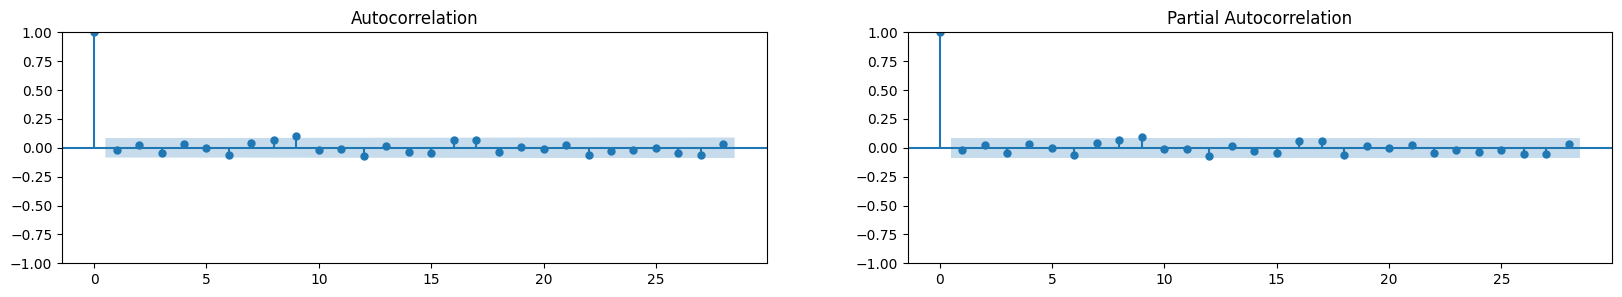

In [ ]:
import statsmodels.api as sm

fig, ax = plt.subplots(1, 2, figsize=(20, 3))
sm.graphics.tsa.plot_acf(train_data.dropna(), ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.dropna(), ax=ax[1])
plt.show()

**Rules of Thumb** for determining AR and MA terms:
- If the PACF plot shows a significant spike at lag p (and none beyond), while the ACF plot decays gradually, use ARIMA(p,d,0).
- If the ACF plot displays a significant spike at lag q (and none beyond), while the PACF decays gradually, use ARIMA(0,d,q).

AS there are no significant spikes neither in ACF nor PACF, we must assume that there are correlations across time, determing $p = 0$ and $q = 0$

These findings line up according to EMH and Random Walk Hypothesis.
An $ARIMA(0,0,0)$ model with zero mean is white noise, so it means that the errors are uncorrelated across time. 
$$
\hat{y}_t = c + \epsilon_t,
$$
where $c$ is a constant and $\epsilon_t$ is an i.i.d. noise term.

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Fit model
arima = ARIMA(train_data.to_numpy(), order=(0, 0, 0))  # p=0, d=0, q=0
arima_model = arima.fit()
# Summary of fit model
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  537
Model:                          ARIMA   Log Likelihood                1715.705
Date:                Mon, 01 Sep 2025   AIC                          -3427.410
Time:                        13:18:16   BIC                          -3418.838
Sample:                             0   HQIC                         -3424.057
                                - 537                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      0.922      0.357      -0.000       0.001
sigma2      9.835e-05   4.68e-06     21.021      0.000    8.92e-05       0.000
Ljung-Box (L1) (Q):                   0.28   Jarque-

### Deep Learning: Conv1D-LSTM
![Conv1D-LSTM](docs/img/conv-lstm.png)

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()

import importlib, patterndecoder.utils

importlib.reload(patterndecoder.utils)

from patterndecoder.utils import compile_and_train, load_config

# Load parameters and hyperparameters from config.json
params = load_config("config/config.yaml")

conv1d_lstm = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(params["window_size"], 1)),
        tf.keras.layers.Conv1D(
            filters=64, kernel_size=3, strides=1, activation="gelu", padding="causal"
        ),
        tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(128, activation="gelu", return_sequences=False)
        ),
        tf.keras.layers.Dense(32, activation="gelu"),
        tf.keras.layers.Dropout(params["dropout"]),
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)

conv1d_lstm.name = "conv1d"

# Compile and train the model
__, conv1d_lstm = compile_and_train(conv1d_lstm, train_data)

### Transformer Models

The study employs several transformer-based architectures, each designed to address specific challenges in time series forecasting:

- **TransformerBlock**: This custom TensorFlow Keras layer implements the core Transformer architecture from "Attention is All You Need." It includes an encoder for processing input sequences, a decoder for generating outputs, and several embedding mechanisms to inject sequence order information. The model handles multi-head self-attention and cross-attention mechanisms, with the option to customize attention types.
- **InformerBlock**: Based on the Informer architecture, this block addresses the quadratic complexity issue of standard transformers through ProbSparse attention and progressive distilling. The distilling mechanism progressively reduces sequence length through convolutional operations with max pooling, enabling efficient processing of long sequences while maintaining performance comparable to full attention models.
- **AutoformerBlock**: This block incorporates two key innovations: (1) a decomposition mechanism that separates trend and seasonal components using moving average filters, and (2) an AutoCorrelation mechanism that replaces traditional attention with an FFT-based approach for capturing time-delay dependencies.
- **PatternDecoderBlock**: The custom PatternDecoderBlock represents a decoder-only Transformer. It by inheriting from the TransformerBlock, but modifying the forward pass to bypass the encoder component. It also can handle customizable multiple multi-head self-attention and cross-attention mechanisms.

#### Attention Mechanisms

The study implements and compares six distinct attention mechanisms, each with specific characteristics and computational properties:

- **Multi-Head Full Attention**: The standard attention mechanism from the original Transformer paper, which computes attention scores between all pairs of positions in the sequence. It has O(L²) complexity where L is the sequence length.
- **Convolutional Multi-Head Full Attention**: Enhances the standard attention by incorporating convolutional layers for query, key, and value mappings. This helps capture local patterns before applying global attention, combining the strengths of CNNs (local feature extraction) with transformers (global dependencies).
- **LogSparse Attention**: Reduces computational complexity to O(L log L) by applying a sparse mask that combines a local window with exponentially spaced connections. This maintains the model's ability to capture both fine-grained local dependencies and important long-range relationships while being more efficient than full attention.
- **ProbSparse Attention**: Used in the Informer architecture, this mechanism selects the most informative query-key pairs based on Kullback-Leibler divergence, reducing complexity to O(L log L) while maintaining comparable performance to full attention.
- **AutoCorrelation Attention**: Replaces the dot-product attention with an auto-correlation mechanism that leverages Fast Fourier Transform to capture time-delay dependencies in the frequency domain, making it particularly suited for time series with periodic patterns.

Each mechanism represents a different trade-off between computational efficiency, ability to capture local patterns, and modeling of long-range dependencies.

#### Time-Series Transformer Model

The **Transformer** model, initially introduced in *[Vaswani et al. (2017)](https://arxiv.org/abs/1706.03762)*, leverages self-attention mechanisms to capture long-range dependencies and complex patterns in sequential data. It is commonly used for tasks like natural language processing and time series forecasting. Unlike traditional recurrent neural networks (RNNs) or convolutional neural networks (CNNs), the Transformer dispenses with recurrence and convolutions entirely, relying solely on attention mechanisms.

The Transformer model consists of an encoder and a decoder, both of which utilize multi-head attention mechanisms. In the context of time series forecasting, this architecture is particularly effective for modeling temporal dependencies without the need for explicit recurrence. Both Encoder and Decoder use multi-head attention to process input sequences. The encoder generates a continuous representation of the input sequence, while the decoder generates output sequences based on this representation. In the decoder, masked attention is used to prevent the model from attending to future positions in the output sequence, ensuring that predictions are made based only on past outputs.

The **Time Series Transformer Models**, as proposed in *[Li et al. (2019)](https://arxiv.org/abs/1907.00235)*, additionally incorporate convolutional and LogSparse operations to enhance the Transformer's performance on time series forecasting tasks. These modifications aim to address the challenges of locality and memory bottlenecks inherent in traditional Transformer architectures.
![TS-Transformer](docs/img/ts-transformer.png)

##### Transformer with Full Multi-Head Attention
**Full Multi-Head Attention** is the standard attention mechanism from the original Transformer paper, which computes attention scores between all pairs of positions in the sequence. It allows the model to attend to information from different representation subspaces at different positions. It projects the input into multiple "heads" (subspaces), performs scaled dot-product attention in each head, and then concatenates and projects the results back to the original dimension. It has $O(L²)$ complexity where L is the sequence length.

![multiHead Attention](docs/img/multihead.png)


In [ ]:
import importlib, patterndecoder.transformer, patterndecoder.attention, patterndecoder.embedding, patterndecoder.utils

importlib.reload(patterndecoder.utils)
importlib.reload(patterndecoder.embedding)
importlib.reload(patterndecoder.attention)
importlib.reload(patterndecoder.transformer)

from patterndecoder.utils import load_config, load_model, compile_and_train
import tensorflow as tf

tf.keras.backend.clear_session()

# Load parameters and hyperparameters from config.json
params = load_config("config/config.yaml")

# This approach uses a time-series transformer utilizing full attention
transformer_model = load_model(params, "models/transformer.yaml")

# Compile and train the model
__, transformer_model = compile_and_train(transformer_model, train_data)


#### Transformer with Convolutional Self-Attention
The **convolutional self-attention** mechanism is designed to improve the model's ability to capture local temporal patterns. This approach replaces the conventional matrix multiplication used in standard self-attention with causal convolution. By employing a kernel size $k$ and stride 1 for input transformation into queries and keys, the model gains enhanced awareness of local context. The causal nature of the convolution ensures that the current position remains temporally isolated from future information, maintaining the model's predictive integrity.

![ConvolutionalAttention](docs/img/conv_multihead.png)

This mechanism can be viewed as a generalization of canonical self-attention. When the kernel size $k$ is set to 1, the proposed method reduces to the standard self-attention formulation, demonstrating its versatility and backward compatibility with existing Transformer architectures. This mechanism enhances standard attention by incorporating convolutional layers for query, key, and value mappings. The convolutional operations help capture local patterns before applying global attention. Since it does not reduce dimensionality, it also has $O(L²)$ complexity.

In [ ]:
import importlib, patterndecoder.transformer, patterndecoder.attention, patterndecoder.embedding, patterndecoder.utils

importlib.reload(patterndecoder.utils)
importlib.reload(patterndecoder.embedding)
importlib.reload(patterndecoder.attention)
importlib.reload(patterndecoder.transformer)

from patterndecoder.utils import load_config, load_model, compile_and_train
import tensorflow as tf

tf.keras.backend.clear_session()

# Load parameters and hyperparameters from config.json
params = load_config("config/config.yaml")

# This approach uses a time-series transformer utilizing convolutional attention
transformer_conv_model = load_model(params, "models/transformer_conv.yaml")

# Compile and train the model
__, transformer_conv_model = compile_and_train(transformer_conv_model, train_data)


##### Transformer with LogSparse Attention

The **LogSparse attention** mechanism reduces computational complexity to $O(L (\log(L))^2)$ by applying a sparse mask that combines a local window with exponentially spaced connections. This maintains the model's ability to capture both fine-grained local dependencies and important long-range relationships

![LogSparse](docs/img/logsparse.png)

In [ ]:
import importlib, patterndecoder.transformer, patterndecoder.attention, patterndecoder.embedding, patterndecoder.utils

importlib.reload(patterndecoder.utils)
importlib.reload(patterndecoder.embedding)
importlib.reload(patterndecoder.attention)
importlib.reload(patterndecoder.transformer)

from patterndecoder.utils import load_config, load_model, compile_and_train
import tensorflow as tf

tf.keras.backend.clear_session()

# Load parameters and hyperparameters from config.json
params = load_config("config/config.yaml")

# This approach uses a time-series transformer utilizing LogSparse attention
transformer_logsparse_model = load_model(params, "models/transformer_logsparse.yaml")

# Compile and train the model
__, transformer_logsparse_model = compile_and_train(
    transformer_logsparse_model, train_data
)

#### Informer Model

The **Informer** architecture, introduced in *[Zhou et al. (2020)](https://arxiv.org/abs/2012.07436)*, is designed to enhance the efficiency of transformer models for long sequence time-series forecasting. The Informer architecture incorporates several innovative modifications to the standard Transformer model:

- **ProbSparse Attention**: This mechanism probabilistically selects key-value pairs, significantly reducing computational complexity and enabling the model to handle longer sequences efficiently.
- **Self-Attention Distilling**: This operation progressively extracts the most salient features from the input sequence, reducing spatial complexity and memory usage.

See *[Informer2020 GitHub Repository](https://github.com/zhouhaoyi/Informer2020)* 

![Informer](docs/img/informer.png)

##### Informer with ProbSparseAttention

In this setup, the **ProbSparseAttention** mechanism is employed within a modified Informer framework which reduces computational complexity by selecting the most important query-key pairs probabilistically, based on Kullback-Leibler divergence. This approach also decreases the time complexity from $O(L^2)$ to $O(L (\log(L)))$. ProbSparseAttention is used for both encoder and decoder attention layers.

In [ ]:
import importlib, patterndecoder.transformer, patterndecoder.informer, patterndecoder.attention, patterndecoder.embedding, patterndecoder.utils

importlib.reload(patterndecoder.utils)
importlib.reload(patterndecoder.embedding)
importlib.reload(patterndecoder.attention)
importlib.reload(patterndecoder.transformer)
importlib.reload(patterndecoder.informer)

from patterndecoder.utils import load_config, load_model, compile_and_train
import tensorflow as tf

tf.keras.backend.clear_session()

# Load parameters and hyperparameters from config.json
params = load_config("config/config.yaml")

# This approach uses an informer utilizing ProbSparse attention
informer_model = load_model(params, "models/informer.yaml")

# Compile and train the model
__, informer_model = compile_and_train(informer_model, train_data)

#### Autoformer

The **Autoformer**, as presented in *[Wu et al. (2021)](https://arxiv.org/abs/2106.13008)*, introduces a decomposition mechanism that separates seasonal and trend components in time series data. It uses **Series Decomposition** that separates the trend and seasonal components of the time series. This is achieved through a moving average filter with progressive depth decay, allowing for the extraction of both trend and residual (seasonal) components.

![Autoformer](docs/img/autoformer.png)

It also utilizes an **AutoCorrelationAttention** mechanism  that leverages Fast Fourier Transform to discover time-delay dependencies within the data, enhancing the model's ability to capture long-term dependencies and seasonal patterns and to capture time-delay dependencies in the frequency domain. 

![Autocorrelation](docs/img/autocorr.png)

In [ ]:
import importlib, patterndecoder.transformer, patterndecoder.autoformer, patterndecoder.attention, patterndecoder.embedding, patterndecoder.utils

importlib.reload(patterndecoder.utils)
importlib.reload(patterndecoder.embedding)
importlib.reload(patterndecoder.attention)
importlib.reload(patterndecoder.transformer)
importlib.reload(patterndecoder.autoformer)

from patterndecoder.utils import load_config, load_model, compile_and_train
import tensorflow as tf

tf.keras.backend.clear_session()

# Load parameters and hyperparameters from config.json
params = load_config("config/config.yaml")

# This approach uses an autoformer utilizing Autocorrelation attention
autoformer_model = load_model(params, "models/autoformer.yaml")

# Compile and train the model
__, autoformer_model = compile_and_train(autoformer_model, train_data)

#### Decoder-Only (DecoderOnlyTransformer)
Unlike the standard Transformer, which uses both encoder and decoder components, the decoder-only Transformers rely solely on the decoder structure. Recent research (see  *[Das et al. (2024)](https://arxiv.org/abs/2310.10688)*) has demonstrated that decoder-only transformers may achieve state-of-the-art results across various sequence modeling tasks, including time series forecasting. Decoder-only transformers can outperform encoder-decoder or encoder-only architectures on financial time series prediction tasks when properly regularized.(see  *[Chen (2025)](https://arxiv.org/abs/2504.16361)*) 

![decoderonly](docs/img/decoderonly.png)

```python
    def call(self, inputs, training=True):
        # Input shape: batch_size x window_size x n_features

        # Token Embedding
        # Output shape: batch_size x window_size x d_model
        embedding = self.embed(inputs)

        # Decoder outputs
        # Output shape: batch_size x window_size x d_model
        dec_outputs = self.decoder(embedding, embedding, training=training)

        # Output shape: batch_size x d_model
        return self.ffn(dec_outputs, training=training)
```


##### Decoder-Only with Full Multi-Head Attention

In [14]:
import importlib, patterndecoder.patterndecoder, patterndecoder.attention, patterndecoder.embedding, patterndecoder.utils, patterndecoder.autoformer,patterndecoder.transformer
importlib.reload(patterndecoder.utils)
importlib.reload(patterndecoder.embedding)
importlib.reload(patterndecoder.attention)
importlib.reload(patterndecoder.transformer)
importlib.reload(patterndecoder.autoformer)
importlib.reload(patterndecoder.patterndecoder)

from patterndecoder.utils import load_config, load_model,compile_and_train
import tensorflow as tf
tf.keras.backend.clear_session()

# Load parameters and hyperparameters from config.json
params = load_config('config/config.yaml')

# This approach uses a time-series DecoderOnlyTransformer utilizing full attention
decoderonly_model = load_model(params, "models/decoderonly.yaml")

# Compile and train the model
__, decoderonly_model = compile_and_train(decoderonly_model, train_data)

##### Decoder-Only (DecoderOnlyTransformer) with Convolutional Self-Attention

In [ ]:
import importlib, patterndecoder.patterndecoder, patterndecoder.attention, patterndecoder.embedding, patterndecoder.utils, patterndecoder.autoformer, patterndecoder.transformer

importlib.reload(patterndecoder.utils)
importlib.reload(patterndecoder.embedding)
importlib.reload(patterndecoder.attention)
importlib.reload(patterndecoder.transformer)
importlib.reload(patterndecoder.autoformer)
importlib.reload(patterndecoder.patterndecoder)

from patterndecoder.utils import load_config, load_model, compile_and_train
import tensorflow as tf

tf.keras.backend.clear_session()

# Load parameters and hyperparameters from config.json
params = load_config("config/config.yaml")

# This approach uses a time-series DecoderOnlyTransformer utilizing full attention
decoderonly_conv_model = load_model(params, "models/decoderonly_conv.yaml")

# Compile and train the model
__, decoderonly_conv_model = compile_and_train(decoderonly_conv_model, train_data)

#### PatternDecoder (Decoder-only Transformer)
The PatternDecoder architecture adopts a decoder-only design similar to simplified Transformer variants while introducing additional encoding components based on convolutional layers and LSTM mechanisms. This hybrid structure aims to enhance local feature extraction and temporal pattern representation beyond what is achieved by self-attention alone.
![patterndecoder](docs/img/patterndecoder.png)

The implementation leverages the `PatternDecoderBlock` class, defined in the `patterndecoder.py` module. This class inherits from the generic TransformerBlock but modifies the forward computation in two key ways:

* Encoder removal: The model omits the encoder stack, adopting a decoder-only design to reduce complexity.
* Additional temporal encoding: An LSTM-based encoder is introduced to capture sequential dependencies, which are then combined with token embeddings before being passed into the decoder.

```python
    def call(self, inputs, training=True):
        # Input shape: batch_size x window_size x n_features

        # Token Embedding
        # Output shape: batch_size x window_size x d_model
        embedding = self.embed(inputs)
        enc = self.lstm_encode(inputs)
        enc = self.layernorm1(enc+embedding)

        # Decoder outputs
        # Output shape: batch_size x window_size x d_model
        dec_outputs = self.decoder(embedding, enc, training=training)

        # Output shape: batch_size x d_model
        return self.ffn(dec_outputs, training=training)
```

The `PatternDecoder` design provides several potential benefits compared to full encoder-decoder Transformers:

- Reduced parameter count and computational cost, improving efficiency for short-sequence forecasting.
- Simplified training process, as the architecture eliminates the encoder component.
- Improved suitability for autoregressive prediction tasks, where decoder-only architectures naturally align with step-wise forecasting.
- Enhanced local and sequential pattern modeling, through the integration of convolutional and LSTM encodings.

##### PatternDecoder with Full Multi-Head Attention


In [ ]:
import importlib, patterndecoder.patterndecoder, patterndecoder.attention, patterndecoder.embedding, patterndecoder.utils, patterndecoder.transformer

importlib.reload(patterndecoder.utils)
importlib.reload(patterndecoder.embedding)
importlib.reload(patterndecoder.attention)
importlib.reload(patterndecoder.transformer)
importlib.reload(patterndecoder.patterndecoder)

from patterndecoder.utils import load_config, load_model, compile_and_train
import tensorflow as tf

tf.keras.backend.clear_session()

# Load parameters and hyperparameters from config.json
params = load_config("config/config.yaml")

# This approach uses a time-series patterndecoder utilizing full attention
patterndecoder_model = load_model(params, "models/patterndecoder.yaml")

# Compile and train the model
__, patterndecoder_model = compile_and_train(patterndecoder_model, train_data)

##### PatternDecoder with Convolutional Self-Attention

In [ ]:
import importlib, patterndecoder.patterndecoder, patterndecoder.attention, patterndecoder.embedding, patterndecoder.utils, patterndecoder.transformer

importlib.reload(patterndecoder.utils)
importlib.reload(patterndecoder.embedding)
importlib.reload(patterndecoder.attention)
importlib.reload(patterndecoder.transformer)
importlib.reload(patterndecoder.patterndecoder)

from patterndecoder.utils import load_config, load_model, compile_and_train
import tensorflow as tf

tf.keras.backend.clear_session()

# Load parameters and hyperparameters from config.json
params = load_config("config/config.yaml")

# This approach uses a time-series patterndecoder utilizing convolutional attention
patterndecoder_conv_model = load_model(params, "models/patterndecoder_conv.yaml")

# Compile and train the model
__, patterndecoder_conv_model = compile_and_train(patterndecoder_conv_model, train_data)

##### AutoPatternDecoder with Autocorrelation Attention
This experimental variant is derived from the Autoformer architecture. In the decoder-only variant, the encoder component is removed to reduce architectural complexity and improve computational efficiency. The modified design retains the core Auto-Correlation attention mechanism within the decoder, enabling periodic dependency modeling without relying on a dedicated encoder stack.

![autopatterndecoder](docs/img/autopatterndecoder.png)

In [ ]:
import importlib, patterndecoder.patterndecoder, patterndecoder.attention, patterndecoder.embedding, patterndecoder.utils, patterndecoder.autoformer, patterndecoder.transformer

importlib.reload(patterndecoder.utils)
importlib.reload(patterndecoder.embedding)
importlib.reload(patterndecoder.attention)
importlib.reload(patterndecoder.transformer)
importlib.reload(patterndecoder.autoformer)
importlib.reload(patterndecoder.patterndecoder)

from patterndecoder.utils import load_config, load_model, compile_and_train
import tensorflow as tf

tf.keras.backend.clear_session()

# Load parameters and hyperparameters from config.json
params = load_config("config/config.yaml")

# This approach uses a time-series autopatterndecoder utilizing Autocorrelation attention
patterndecoder_autocorr_model = load_model(
    params, "models/patterndecoder_autocorr.yaml"
)

# Compile and train the model
__, patterndecoder_autocorr_model = compile_and_train(
    patterndecoder_autocorr_model, train_data
)

## Evaluation Protocol

### Prediction Generation \& Postprocessing

The models predict daily log returns, which are subsequently transformed back to price space for visualization and error calculation. Each prediction window is generated independently using ground truth history.

1. **Log Return Prediction**
Models directly forecast the next time step's log return 5 timesteps ahead using a fixed historical window:

2. **Cumulative Return Conversion**
Predictions are also converted back to cumulative returns for visual interpretation:

$$
P_t = \exp\left(\sum_{i=1}^t \hat{r}_i\right)
$$

### Visual Validation

The evaluation visualizes two perspectives:

1. **Log Return Space**
Compares predicted vs actual log returns using MAE/RMSE.
2. **Price Space**
Shows cumulative returns reconstruction

### Comparative Analysis
To ensure fairness in comparison:

- All models are trained using consistent hyperparameters, as specified in config.json, including learning rate, dropout rate, batch size, and loss function.
- Results are presented in a tabular format showing MAE and RMSE for both training and testing datasets. This allows easy identification of the most accurate models.

### Error Analysis
Quantitative results are complemented by error analysis:

- MAE and RMSE values are computed separately for training and testing datasets.
- These metrics help identify issues such as overfitting (large train-test performance gaps) or underfitting (high errors across both sets).

2025-09-01 13:21:08.018169: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-01 13:21:08.404020: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


+-----------------------------+-----------+----------+------------+-----------+
|            Model            | MAE Train | MAE Test | RMSE Train | RMSE Test |
+-----------------------------+-----------+----------+------------+-----------+
|        PatternDecoder       |  0.007105 | 0.007284 |  0.009527  |  0.009382 |
|       Transformer_Conv      |  0.007239 | 0.007303 |  0.009752  |  0.009438 |
|     PatternDecoder_Conv     |  0.007092 | 0.007321 |  0.009454  |  0.009379 |
|         Transformer         |  0.00705  | 0.007327 |  0.009518  |  0.009556 |
|            conv1d           |  0.007177 | 0.007332 |  0.009738  |  0.009401 |
|    DecoderOnlyTransformer   |   0.0071  | 0.007338 |  0.009611  |  0.009407 |
|            ARIMA            |  0.007183 | 0.007341 |  0.009739  |  0.009414 |
|            Naive            |  0.007206 | 0.00736  |  0.009754  |  0.009449 |
| DecoderOnlyTransformer_Conv |  0.007084 | 0.007372 |  0.009547  |  0.009438 |
|    Transformer_Logsparse    |  0.00717

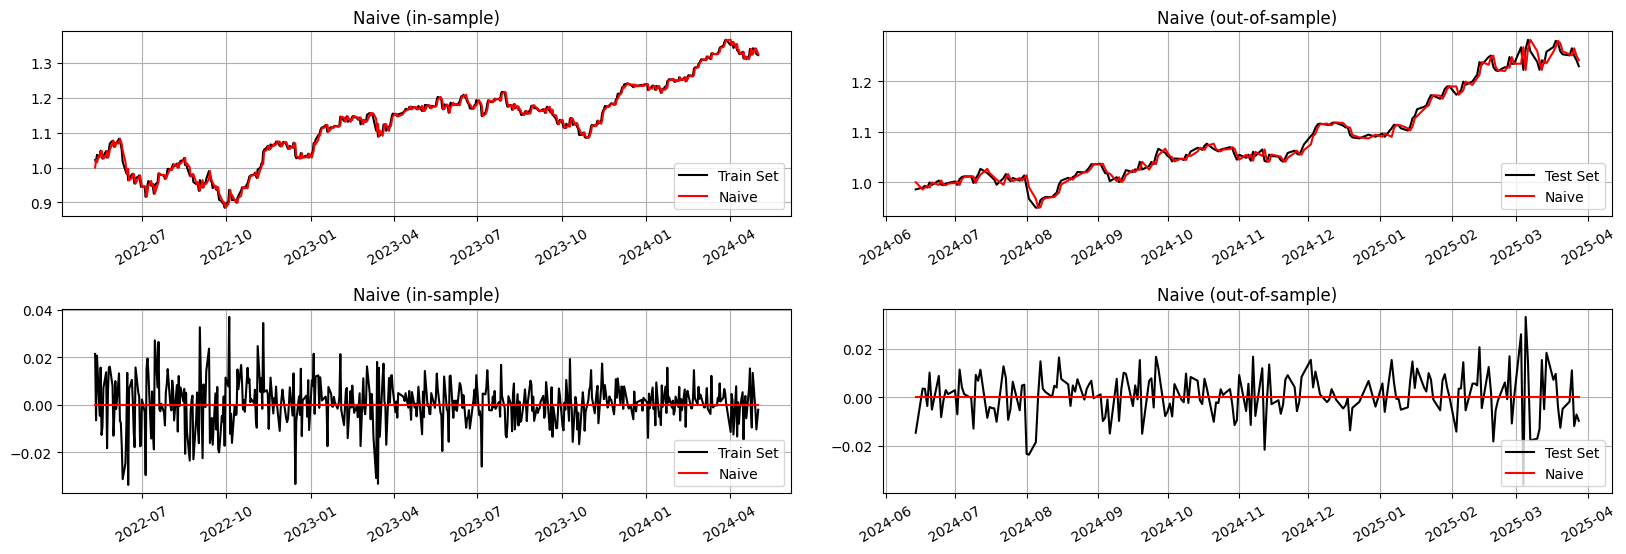

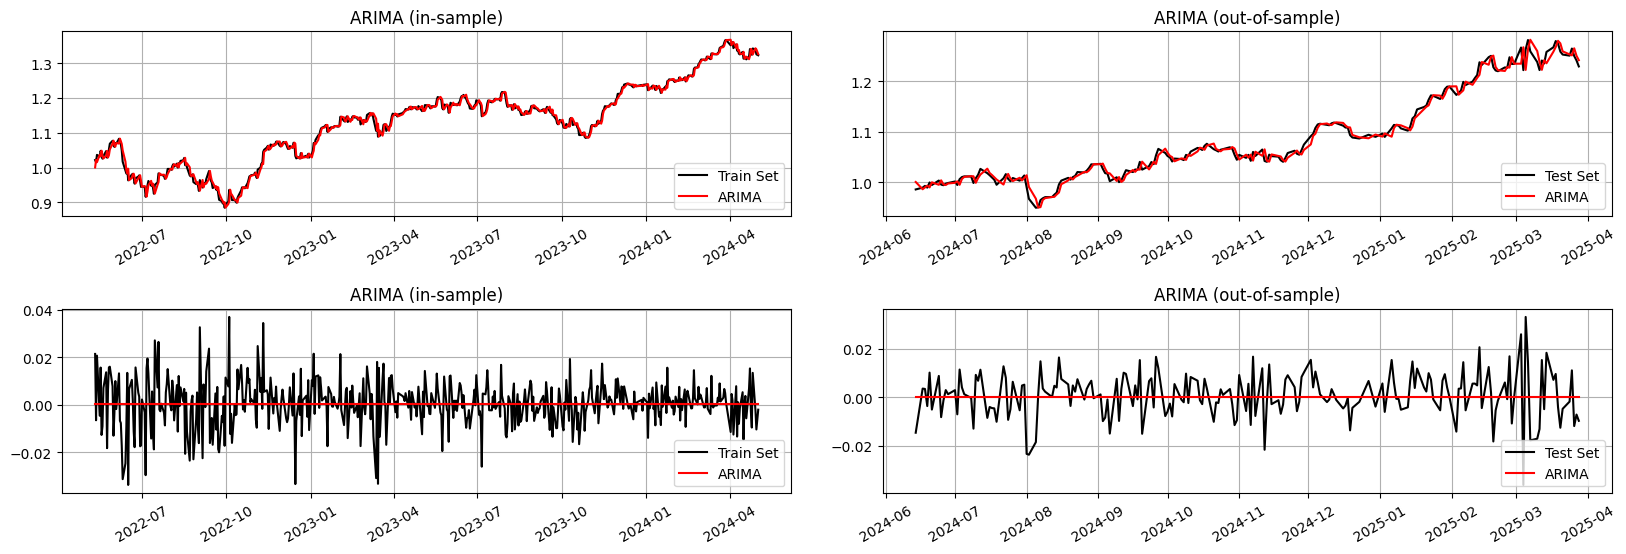

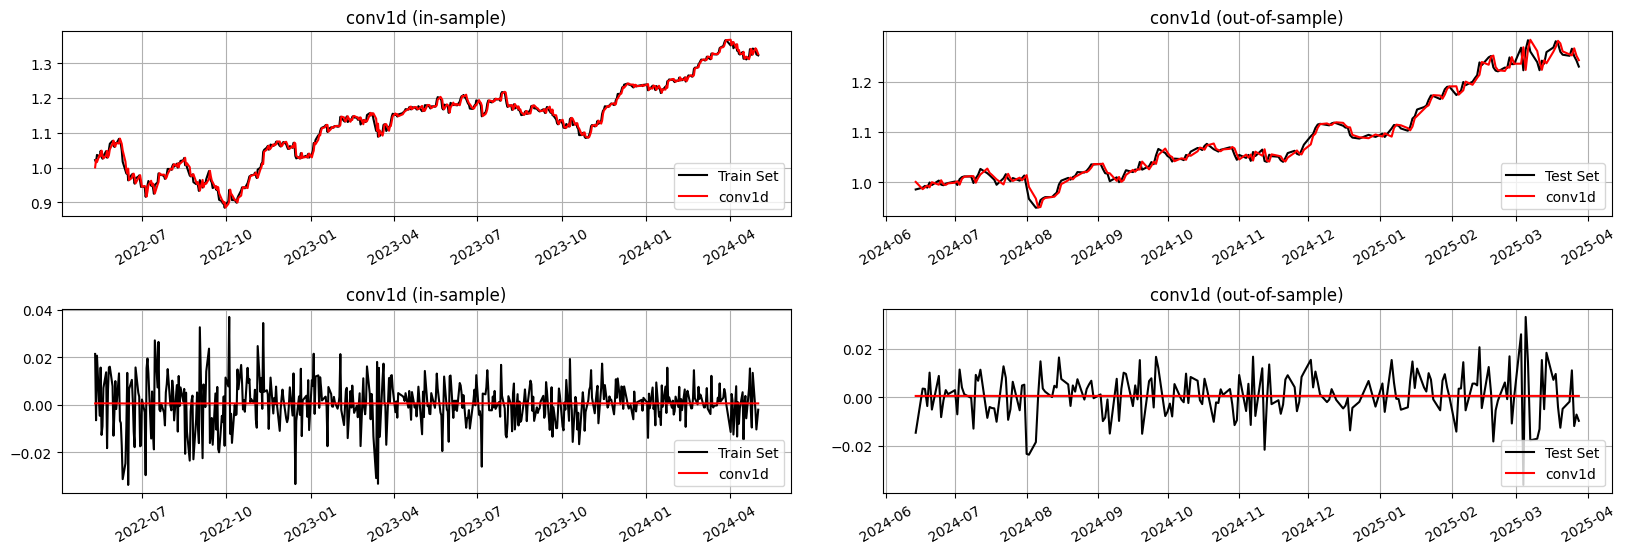

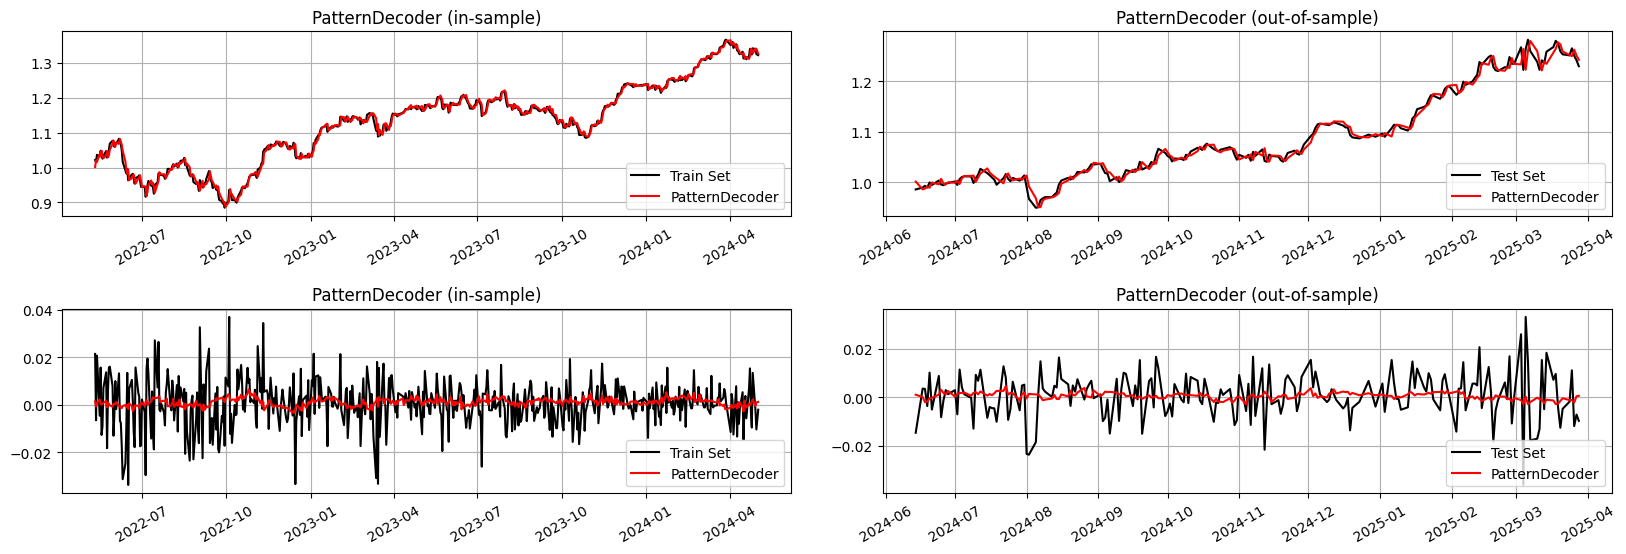

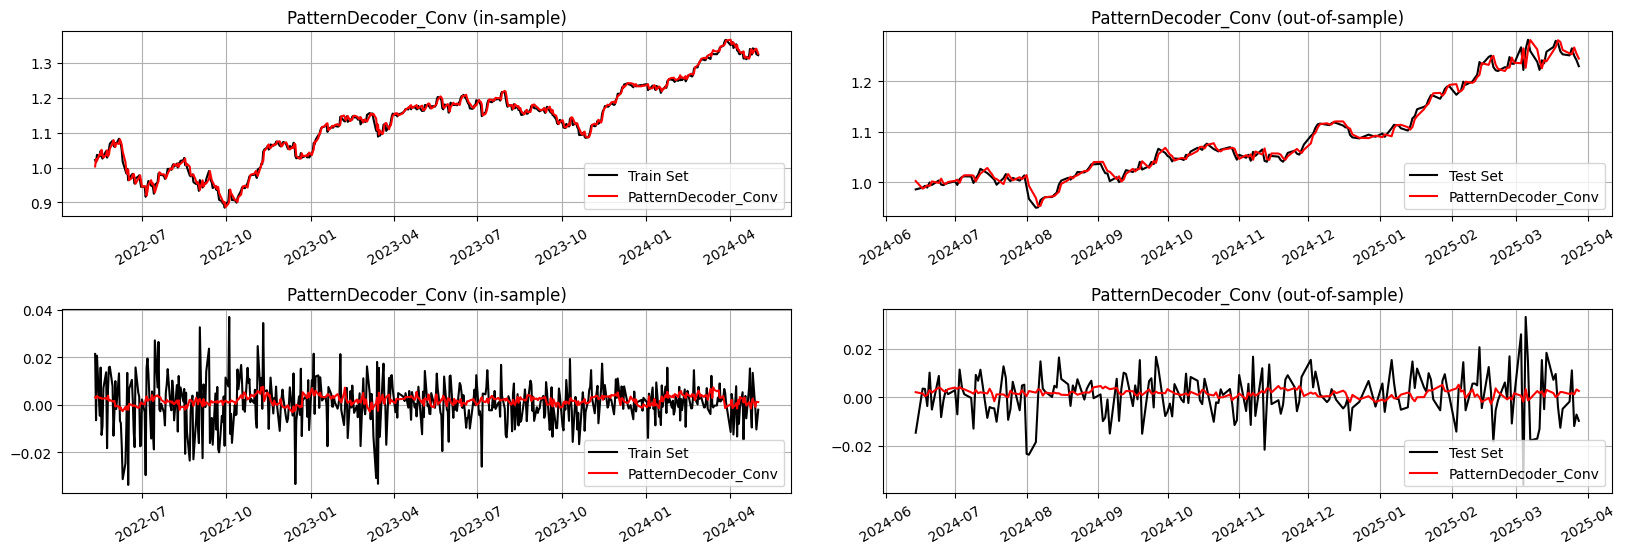

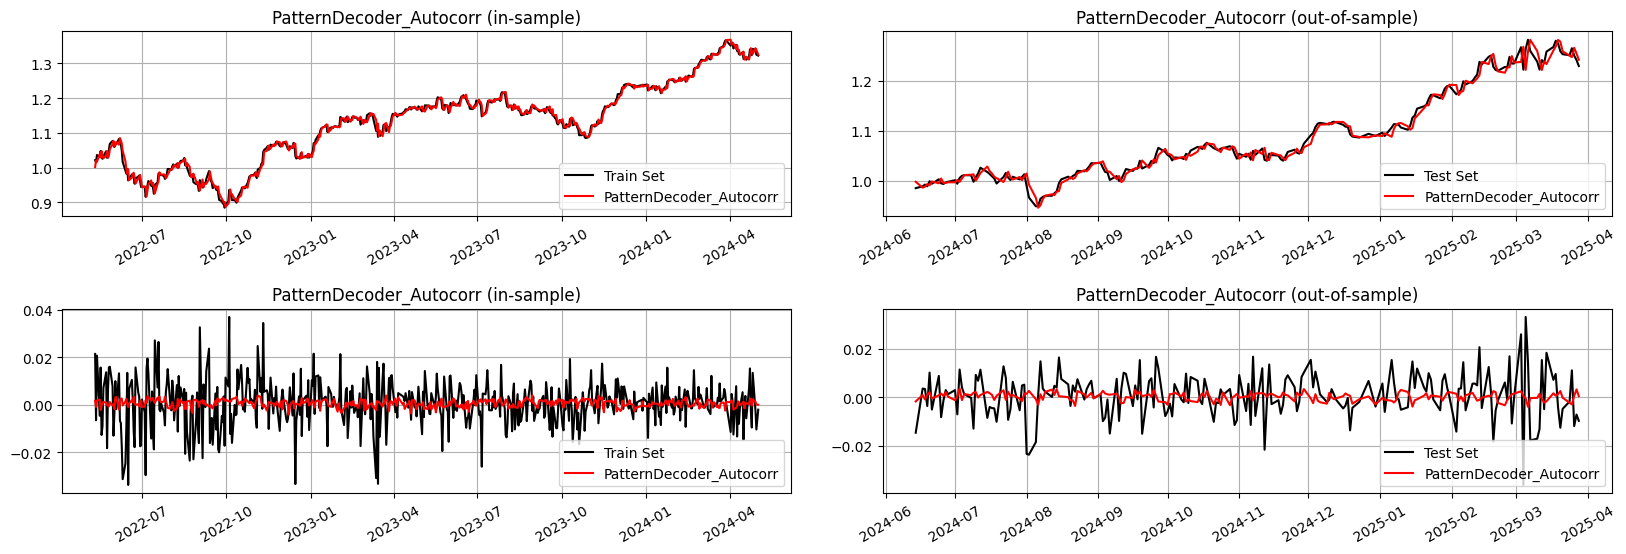

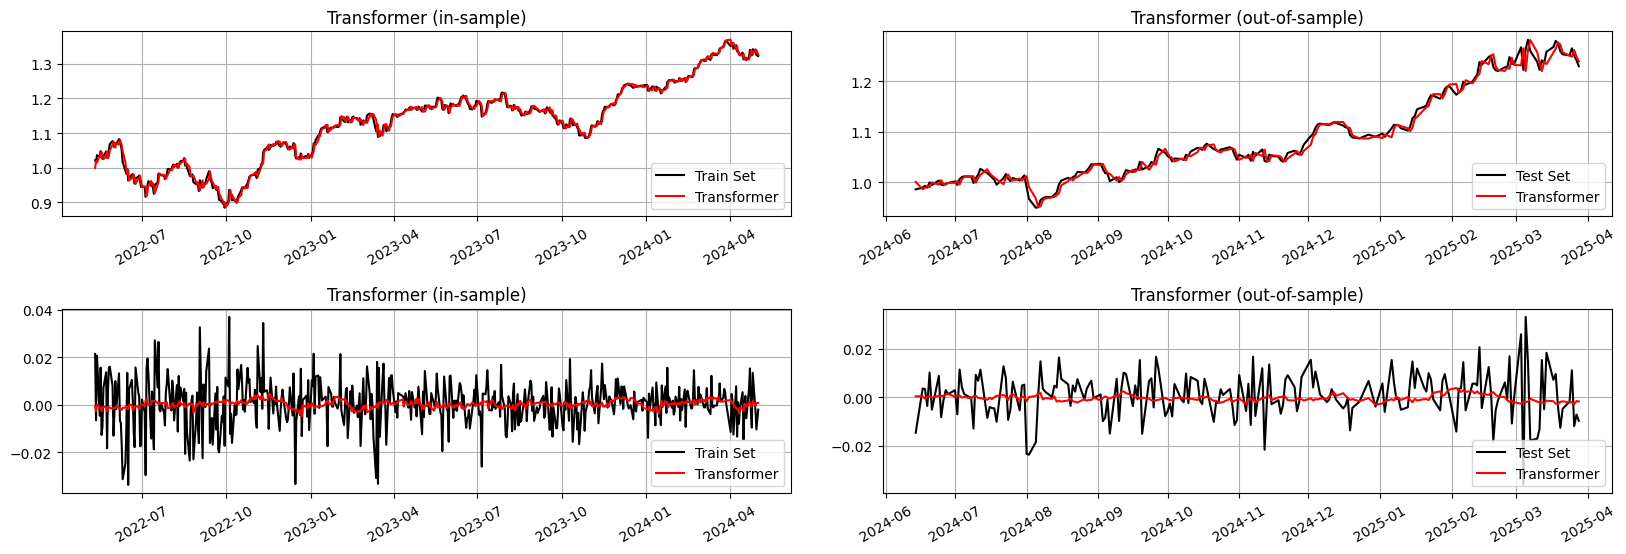

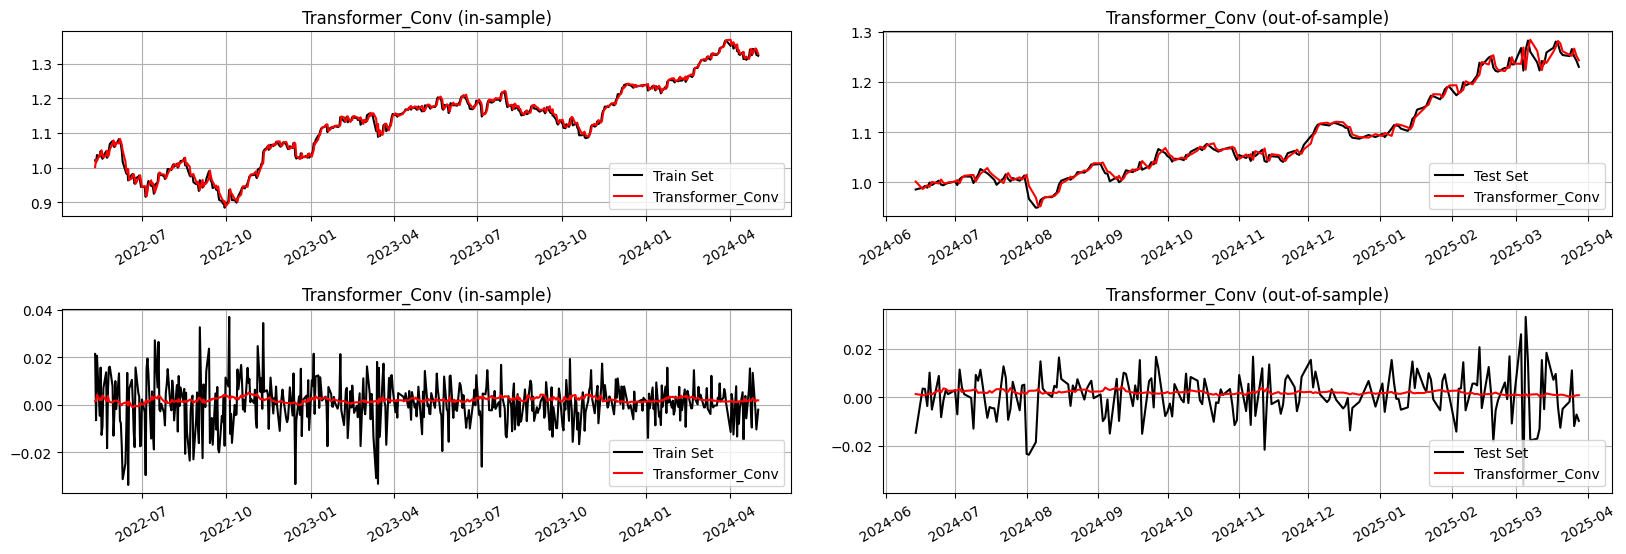

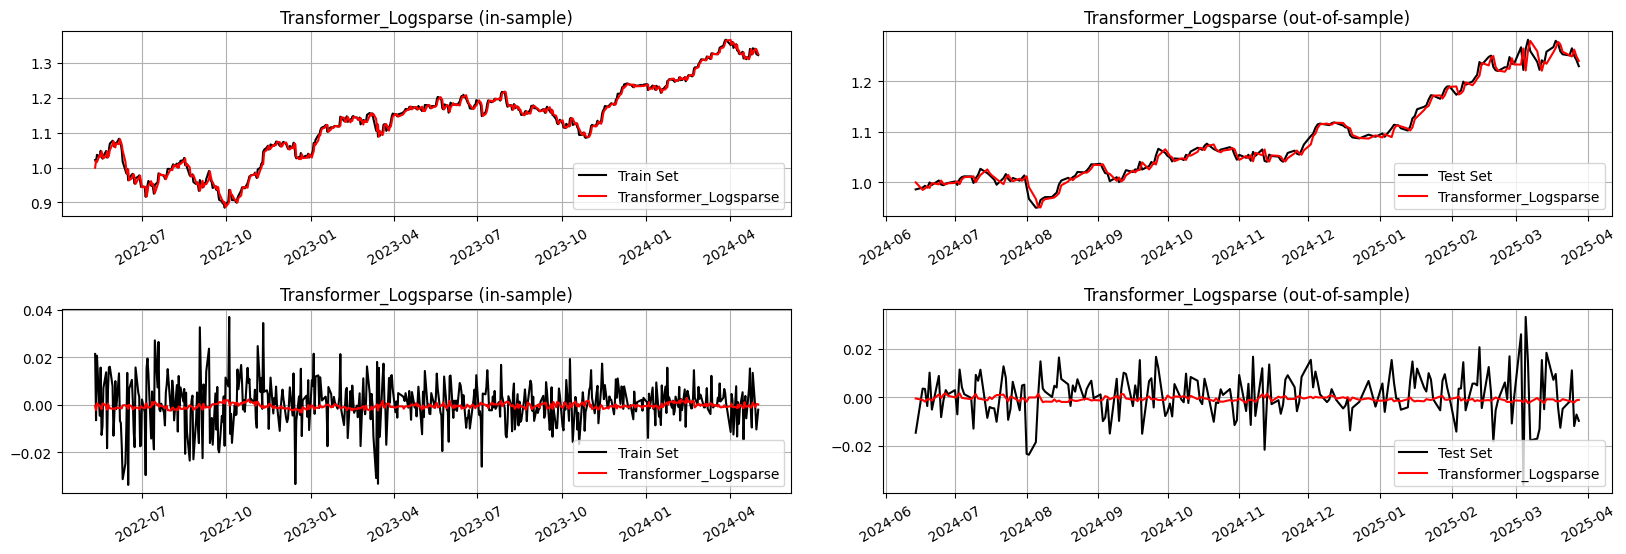

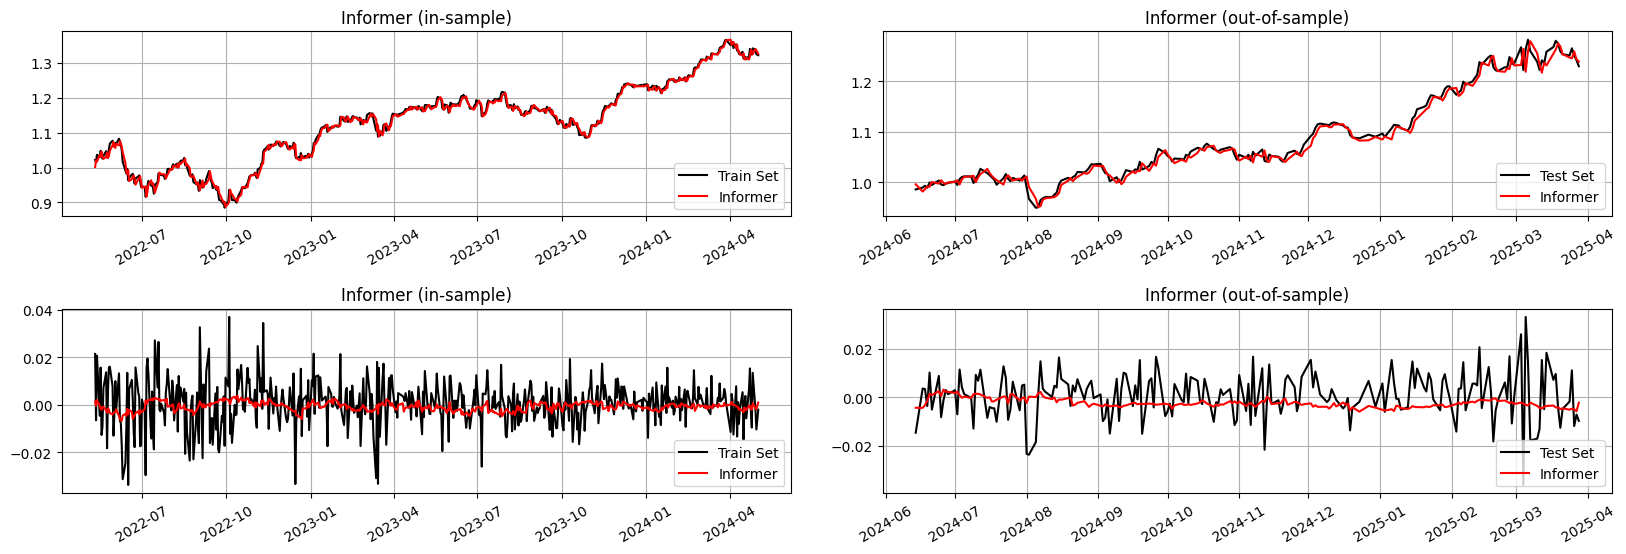

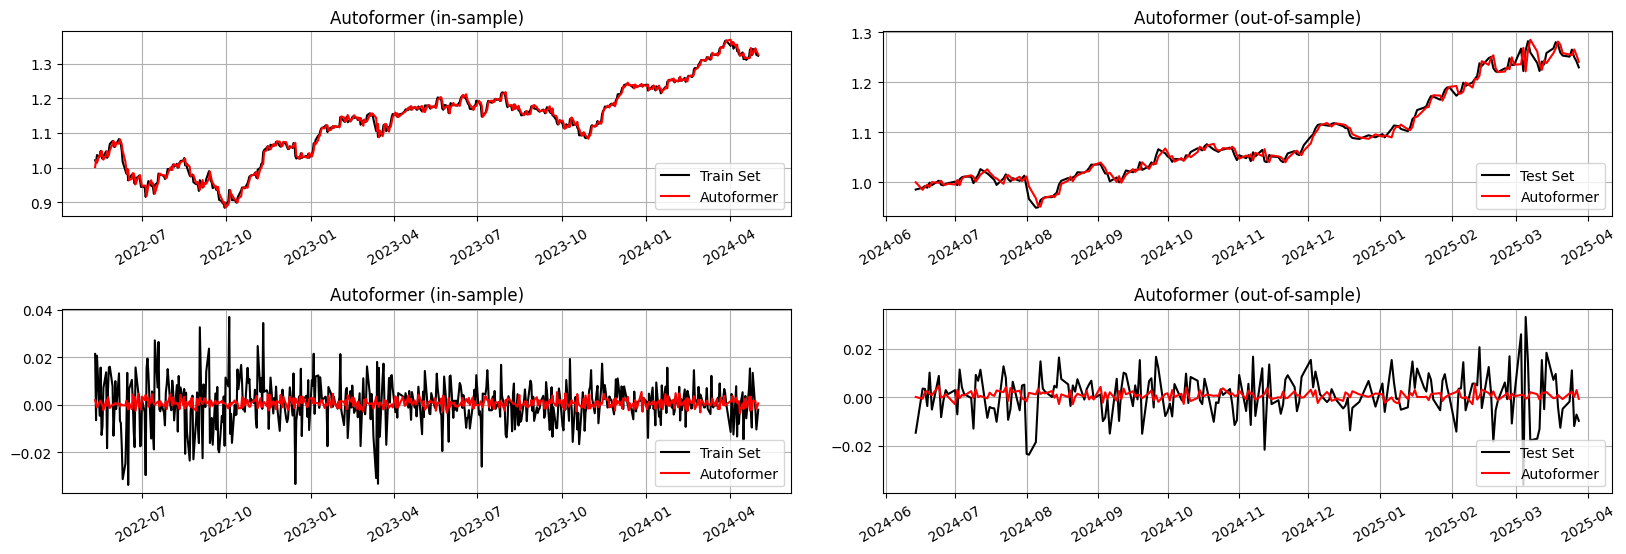

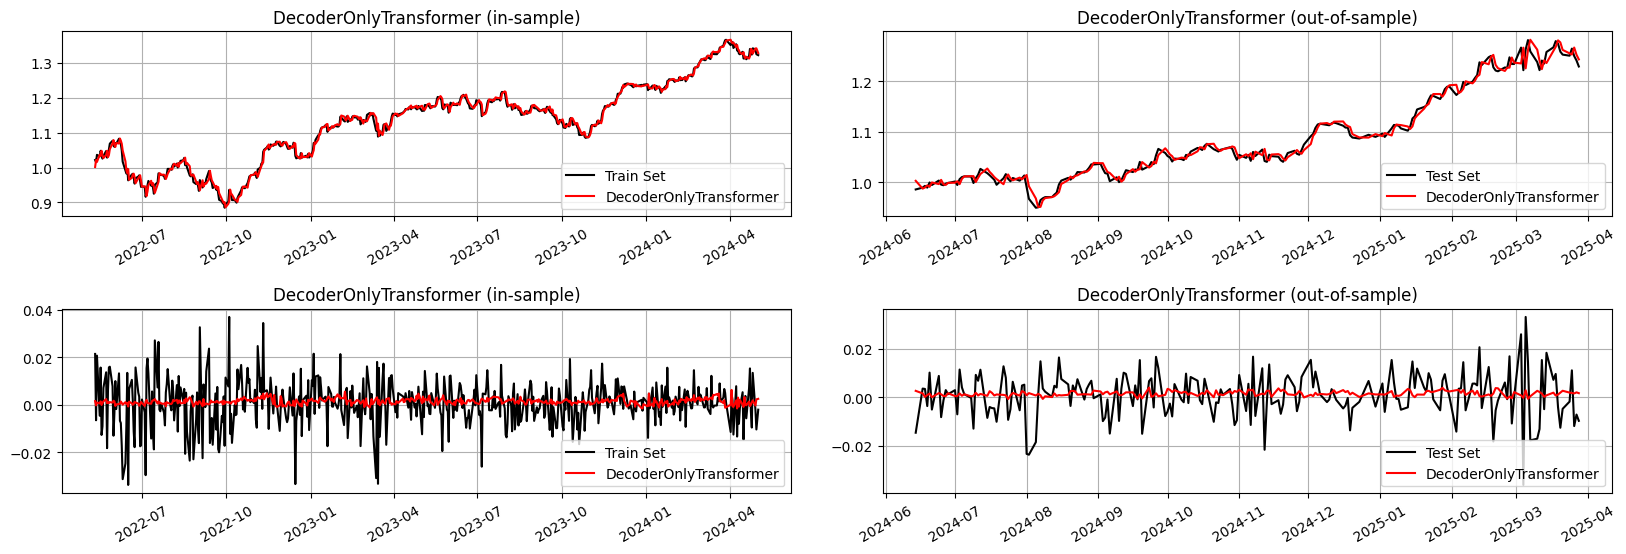

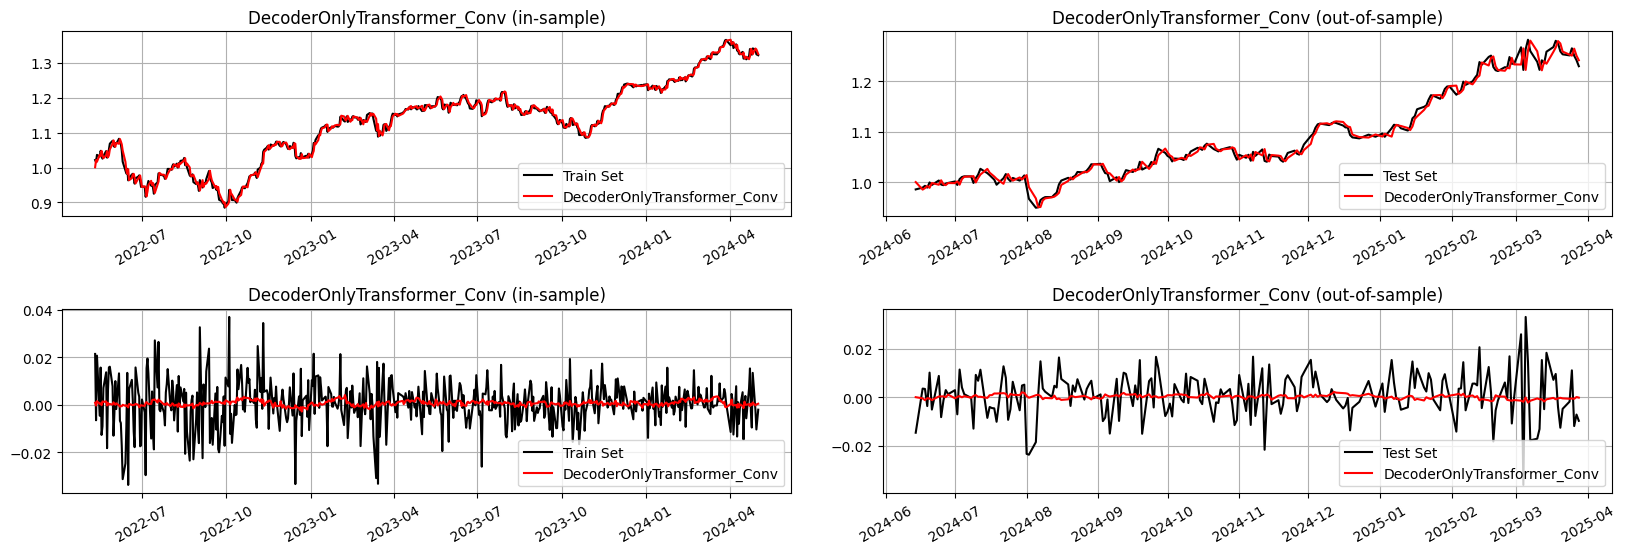

In [ ]:
import importlib, patterndecoder.utils

importlib.reload(patterndecoder.utils)

from patterndecoder.utils import Naive, Forecasts, load_config

# Load parameters and hyperparameters from config.yaml
params = load_config("config/config.yaml")

# Generate Naïve Model
naive_model = Naive(params["forecast_horizon"], params["window_size"])

models = [
    # Baseline models
    naive_model,
    arima_model,
    conv1d_lstm,
    # PatternDecoder models
    patterndecoder_model,
    patterndecoder_conv_model,
    patterndecoder_autocorr_model,
    # Transformer models
    transformer_model,
    transformer_conv_model,
    transformer_logsparse_model,
    # Informer model
    informer_model,
    # Autoformer model
    autoformer_model,
    # Decoder-only model
    decoderonly_model,
    decoderonly_conv_model,
]

# Print table and plots
forecasts = Forecasts(models, params, [train_data, test_data])
forecasts.print_model_metrics()
forecasts.plot_model_performances()

# Discussion of Results

The experimental evaluation of Transformer-based architectures for DAX40 log return forecasting provides insights into the relative effectiveness of various modeling strategies and highlights the challenges associated with immediate-term financial time series prediction.

## Performance Analysis

### Model Rankings

The evaluation based on test set performance establishes a narrow performance range across all models, with the top-performing architectures belonging to the **PatternDecoder family**. The best result is achieved by **PatternDecoder with full attention**, yielding a **test MAE of 0.007284** and **RMSE of 0.009382**. This is closely followed by the **PatternDecoder with convolutional attention** (MAE = 0.007321, RMSE = 0.009379) and the **Transformer with convolutional attention** (MAE = 0.007303, RMSE = 0.009438).

The **baseline models** remain competitive:

* **Conv1D-LSTM**: MAE = 0.007332, RMSE = 0.009401
* **ARIMA**: MAE = 0.007341, RMSE = 0.009414
* **Naïve**: MAE = 0.007360, RMSE = 0.009449

The **lower-performing models** include specialized architectures, notably:

* **Autoformer** (Autocorrelation): MAE = 0.007492, RMSE = 0.009587
* **PatternDecoder-Autocorr**: MAE = 0.007655, RMSE = 0.009816
* **Informer** (ProbSparse): MAE = 0.007793, RMSE = 0.010049

The spread between the best-performing model and the Naïve baseline corresponds to a marginal improvement of approximately **1.0% in MAE**, underscoring the inherent difficulty of forecasting in this domain.

## Architectural Analysis

### PatternDecoder Architecture

The **decoder-only PatternDecoder** consistently ranks at the top across attention mechanisms. Its full attention variant slightly outperforms the convolutional configuration by a **MAE margin of 0.000037**. The autocorrelation-based variant performs less favorably (MAE = 0.007655), suggesting limited benefit from this specialized mechanism in short-horizon financial prediction.

### Attention Mechanism Effects

Attention type exerts a moderate influence on performance. Across architectures, **full or convolutional attention** tends to deliver **better results** relative to sparse attention. 

### Specialized Architectures

Specialized designs such as **Autoformer** and **Informer**, which incorporate decomposition or sparse attention for long-sequence modeling, **underperform relative to simpler alternatives**. Informer, in particular, exhibits the **highest error rates** among all models, suggesting that strategies tailored for long-range dependencies provide little advantage in the short-sequence financial setting.

## Forecasting Implications

The findings highlight several practical considerations:

* **Marginal gains from advanced models**: Transformer-based architectures yield only minor improvements over simple benchmarks, necessitating a cost-benefit analysis when deploying computationally expensive models.
* **Decoder-only efficiency**: The PatternDecoder offers strong performance at reduced complexity, suggesting suitability for **real-time applications**.
* **Attention selection matters**: Convolutional attention emerges as a **reliable enhancement**, particularly for architectures handling short input sequences.
* **Baseline relevance persists**: Given the minimal performance differential, **simple models remain a valid option** for operational forecasting tasks, especially when resource efficiency is a priority. Traditional baselines (Naïve, ARIMA, Conv1D-LSTM) remain **highly competitive**, with performance differences relative to advanced neural architectures limited to the **third decimal place**. This narrow gap reflects the **high noise-to-signal ratio** and the **efficient market characteristics** of financial returns.

The narrow error margins across all evaluated models confirm the **intrinsic challenge of financial market predictability**, where structural noise and regime shifts limit systematic forecasting improvements.
